### 002884 凌霄泵业
##### 加权平均净资产收益率

| 2019 | 2018 | 2017 |
| ---- | ---- | ---- |
| 20.76% | 17.36% | 22.79% |

##### 2020-12-23
* 收入增长较低

In [12]:
ticker = '002884'

In [13]:
%%html
<style>
table {float:left}
</style>

In [14]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [16]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,1.41,1.41,"1,135,156,055 ( 2.8%)","857,614,419 ( -2.8%)","272,382,548 ( 22.1%)"
2018-12-31,1.13,1.13,"1,104,420,873 ( 12.3%)","882,721,431 ( 10.8%)","223,171,460 ( 18.5%)"
2017-12-31,1.78,1.78,"983,688,131 ( 20.7%)","796,430,663 ( 22.0%)","188,365,903 ( 25.5%)"
2016-12-31,2.58,2.58,"815,233,484 ( 6.5%)","652,634,861 ( 1.4%)","150,091,755 ( 31.8%)"
2015-12-31,NaN,NaN,"765,176,261 ( 2.8%)","643,475,285 ( 4.0%)","113,863,348 ( -1.1%)"
2014-12-31,NaN,NaN,"744,418,587 ( nan%)","619,006,921 ( nan%)","115,078,376 ( nan%)"


In [17]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"404,594,293 ( 33.0%)","110,344,645 ( 41.2%)"
2020-06-30,"324,702,052 ( 24.5%)","94,331,363 ( 52.3%)"
2020-03-31,"242,965,910 ( -4.6%)","64,062,849 ( 9.5%)"
2019-12-31,"315,335,322 ( 3.2%)","73,745,329 ( 15.2%)"
2019-09-30,"304,228,865 ( 7.2%)","78,165,945 ( 21.2%)"
2019-06-30,"260,871,679 ( -9.7%)","61,956,202 ( 13.2%)"
2019-03-31,"254,720,189 ( 12.6%)","58,515,072 ( 46.5%)"
2018-12-31,"305,542,801 ( 10.1%)","64,001,263 ( 11.6%)"
2018-09-30,"283,816,820 ( 7.7%)","64,489,159 ( 18.1%)"


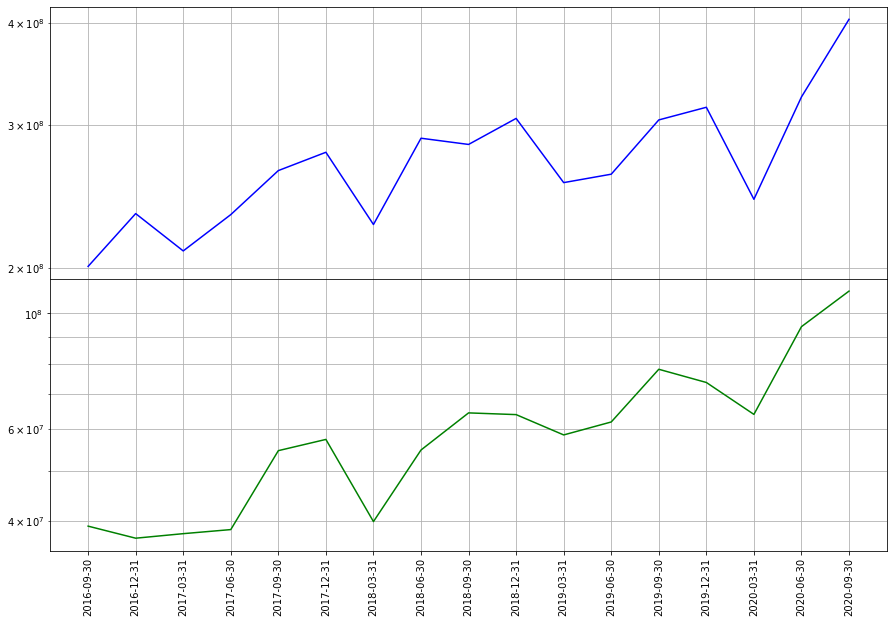

In [18]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [19]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,33.6,24.0
2018-12-31,29.6,20.2
2017-12-31,29.7,19.1
2016-12-31,31.5,18.4
2015-12-31,26.4,14.9
2014-12-31,27.5,15.5


In [20]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"1,135,156,055 ( 2.8%)","217,687,961 ( -7.6%)","62,344,559 ( 23.4%)","63,961,171 (-20.2%)"
2018-12-31,"1,104,420,873 ( 12.3%)","235,559,749 ( 2.4%)","50,512,629 ( 4.4%)","80,127,108 ( 30.7%)"
2017-12-31,"983,688,131 ( 20.7%)","230,006,920 ( 25.4%)","48,394,780 ( -8.5%)","61,317,144 ( 20.8%)"
2016-12-31,"815,233,484 ( 6.5%)","183,390,958 ( 4.4%)","52,912,289 ( 42.3%)","50,780,014 ( 14.9%)"
2015-12-31,"765,176,261 ( 2.8%)","175,683,828 (-20.3%)","37,171,780 (-17.1%)","44,200,141 ( -5.0%)"
2014-12-31,"744,418,587 ( nan%)","220,550,167 ( nan%)","44,841,657 ( nan%)","46,522,607 ( nan%)"


In [21]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率       前复权增长
      first   last   min   max      
交易日期                                
2017  12.81  16.14  20.7  31.5  26.0
2018  16.10  10.31  10.8  24.4 -36.0
2019  10.41  12.69   9.9  17.1  21.9
2020  12.73  23.90  10.2  23.8  87.7
2021  23.33  27.80  17.2  21.6  19.2

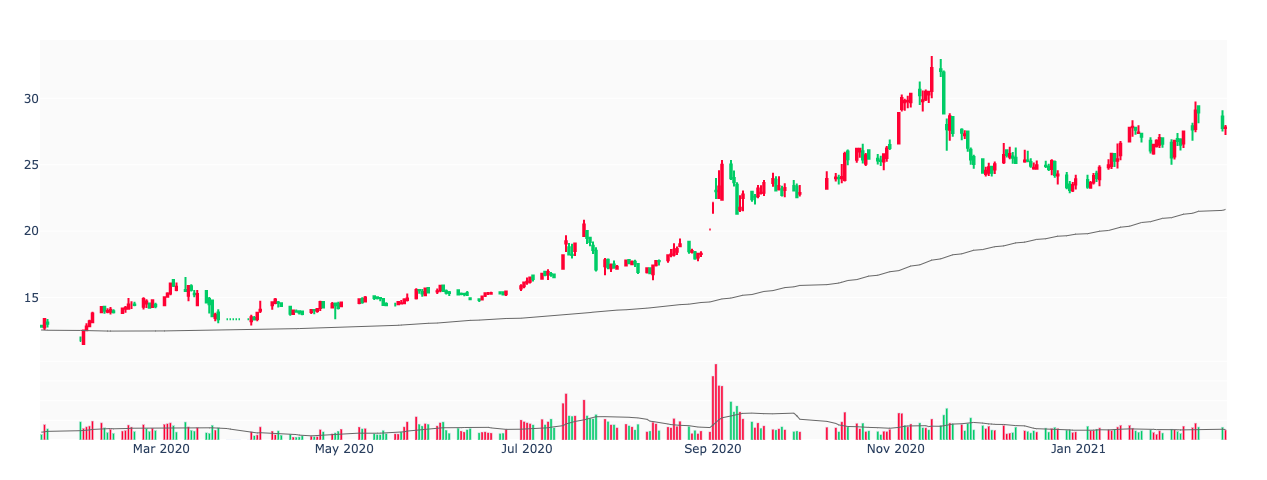

In [22]:
draw(mkt, 260, 200, 20)